In [4]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.datasets import cifar10
from keras import layers, Input
import numpy as np
from keras.models import Sequential

# Local imports:
import sys
sys.path.append("../../Code")
from utils import show_train_history

In [5]:
# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', input_shape=(32, 32, 3), include_top=False)

# Remove the last layer from the base model
base_model.layers.pop()

# Create a Sequential model
model = Sequential()

# Add the ResNet50 base model to the Sequential model
model.add(base_model)

# Flatten the output of the ResNet50 model
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

# Add a Dense layer with 10 units (assuming 10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24114826 (91.99 MB)
Trainable params: 24061706 (91.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [6]:
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
# Adam with decay:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
# use a learning rate scheduler as callback
from keras.callbacks import LearningRateScheduler
def schedule(epoch):
    if epoch < 5:
        return 0.001
    if epoch < 10:
        return 0.0005
    return 0.0001
cb = LearningRateScheduler(schedule)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_split=0.2,
                    callbacks=[cb])


Epoch 1/20
157/157 [==============================] - 20s 37ms/step - loss: 1.0814 - accuracy: 0.6471 - val_loss: 1.3575 - val_accuracy: 0.6321 - lr: 0.0010
Epoch 2/20
157/157 [==============================] - 5s 32ms/step - loss: 0.6002 - accuracy: 0.7997 - val_loss: 0.9820 - val_accuracy: 0.6946 - lr: 0.0010
Epoch 3/20
157/157 [==============================] - 5s 32ms/step - loss: 0.4415 - accuracy: 0.8489 - val_loss: 1.2327 - val_accuracy: 0.6888 - lr: 0.0010
Epoch 4/20
157/157 [==============================] - 5s 31ms/step - loss: 0.3380 - accuracy: 0.8864 - val_loss: 0.7780 - val_accuracy: 0.7673 - lr: 0.0010
Epoch 5/20
157/157 [==============================] - 5s 32ms/step - loss: 0.2797 - accuracy: 0.9052 - val_loss: 0.9367 - val_accuracy: 0.7511 - lr: 0.0010
Epoch 6/20
157/157 [==============================] - 5s 31ms/step - loss: 0.1288 - accuracy: 0.9564 - val_loss: 0.7301 - val_accuracy: 0.8088 - lr: 5.0000e-04
Epoch 7/20
157/157 [==============================] - 5s 31

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


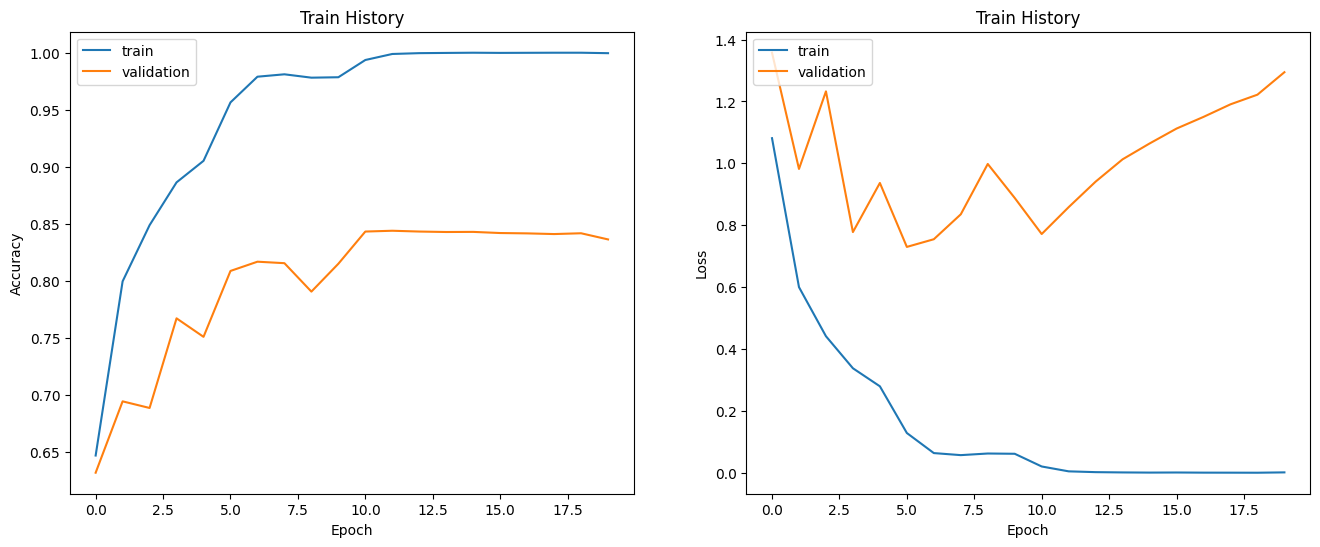

In [7]:
show_train_history(history)